# Initialization

In [1]:
%matplotlib inline
%config InlineBackend.figure_format = 'svg'

import scqubits as scq
import scqubits.utils.plotting as plot

import numpy as np

# Fluxonium qubit

$H_\text{fl}=-4E_\text{C}\partial_\phi^2-E_\text{J}\cos(\phi-\varphi_\text{ext}) +\frac{1}{2}E_L\phi^2$

In [2]:
fluxonium = scq.Fluxonium(
    EJ=8.9,
    EC=2.5,
    EL=0.5,
    cutoff = 110,
    flux = 0.5
)

In [3]:
fluxonium = scq.Fluxonium.create()

Output()

In [4]:
print(fluxonium)

FLUXONIUM
 ———— PARAMETERS ————
EJ	: 8.9
EC	: 2.5
EL	: 0.5
flux	: 0.0
cutoff	: 110
truncated_dim	: 10
Hilbert space dimension	: 110


In [8]:
fluxonium.eigenvals()

array([-2.03660435,  0.39569092,  0.39717675,  1.09346244,  3.10905891,
        3.35361034])

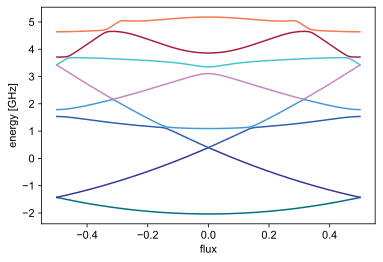

In [6]:
flux_list = np.linspace(-0.5, 0.5, 151)
fluxonium.plot_evals_vs_paramvals('flux', flux_list, evals_count=8);

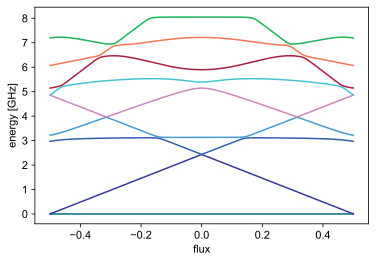

In [8]:
fluxonium.plot_evals_vs_paramvals('flux', flux_list, evals_count=9, subtract_ground=True);

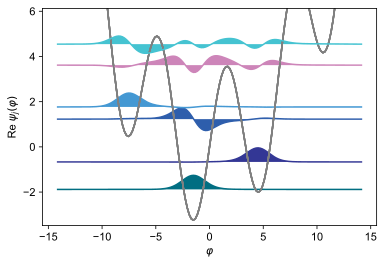

In [5]:
fluxonium.flux = 0.25
fluxonium.plot_wavefunction(esys=None, which=[0, 1, 2, 3, 5, 6], mode='real');

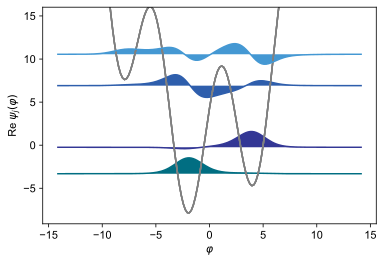

In [8]:
fluxonium.plot_wavefunction(esys=None, which=[0, 1, 2, 3], mode='real');

### Matrix elements

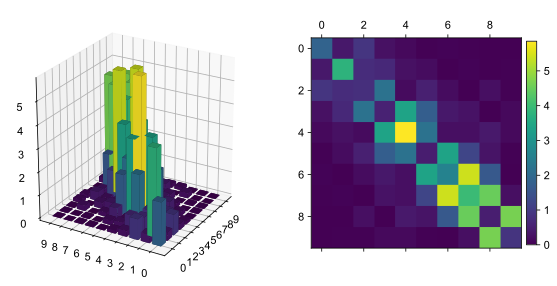

In [9]:
phimat = fluxonium.matrixelement_table('phi_operator', evals_count=10)
plot.matrix(phimat);

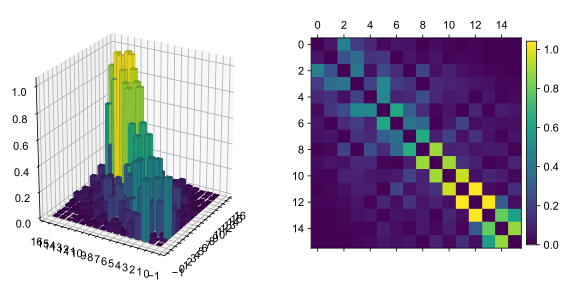

In [10]:
fluxonium.plot_matrixelements('n_operator', evals_count=16);